In [2]:
#Print multiple outputs together
from __future__ import print_function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import sys
print("python version",sys.version)

import warnings
warnings.filterwarnings('ignore')


python version 3.7.13 (default, Oct 19 2022, 10:19:43) [MSC v.1916 64 bit (AMD64)]


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df= pd.read_csv('../Machine_models/Dataset/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
category_col = df.select_dtypes(exclude = np.number)

for col in category_col:
    df[col].value_counts(normalize= True)
    print(col,"variables unique values are",end = " ")
    print(df[col].unique())
    print("--"*27)

city                        0.086379
corolla altis               0.053156
verna                       0.046512
fortuner                    0.036545
brio                        0.033223
                              ...   
Honda CB Trigger            0.003322
Yamaha FZ S                 0.003322
Bajaj Pulsar 135 LS         0.003322
Activa 4g                   0.003322
Bajaj Avenger Street 220    0.003322
Name: Car_Name, Length: 98, dtype: float64

Car_Name variables unique values are ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'B

Petrol    0.794020
Diesel    0.199336
CNG       0.006645
Name: Fuel_Type, dtype: float64

Fuel_Type variables unique values are ['Petrol' 'Diesel' 'CNG']
------------------------------------------------------


Dealer        0.647841
Individual    0.352159
Name: Seller_Type, dtype: float64

Seller_Type variables unique values are ['Dealer' 'Individual']
------------------------------------------------------


Manual       0.86711
Automatic    0.13289
Name: Transmission, dtype: float64

Transmission variables unique values are ['Manual' 'Automatic']
------------------------------------------------------


In [6]:
#Check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
final_df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
final_df.head()
final_df.shape

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


(301, 8)

In [11]:
final_df['current_year'] = 2023
final_df['number_of_year'] = final_df['current_year'] - final_df['Year']

In [12]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,number_of_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [13]:
# Dropping columns which do not serve the purpose
final_df.drop(['current_year', 'Year'], axis=1, inplace= True)


In [14]:
final_df.head()
final_df.shape

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,number_of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


(301, 8)

In [15]:
# Encoding categorical columns
final_df = pd.get_dummies(final_df, drop_first= True)
final_df[:5]

,Selling_Price,Present_Price,Kms_Driven,Owner,number_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [16]:
# Correlation matrix
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,number_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
number_of_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


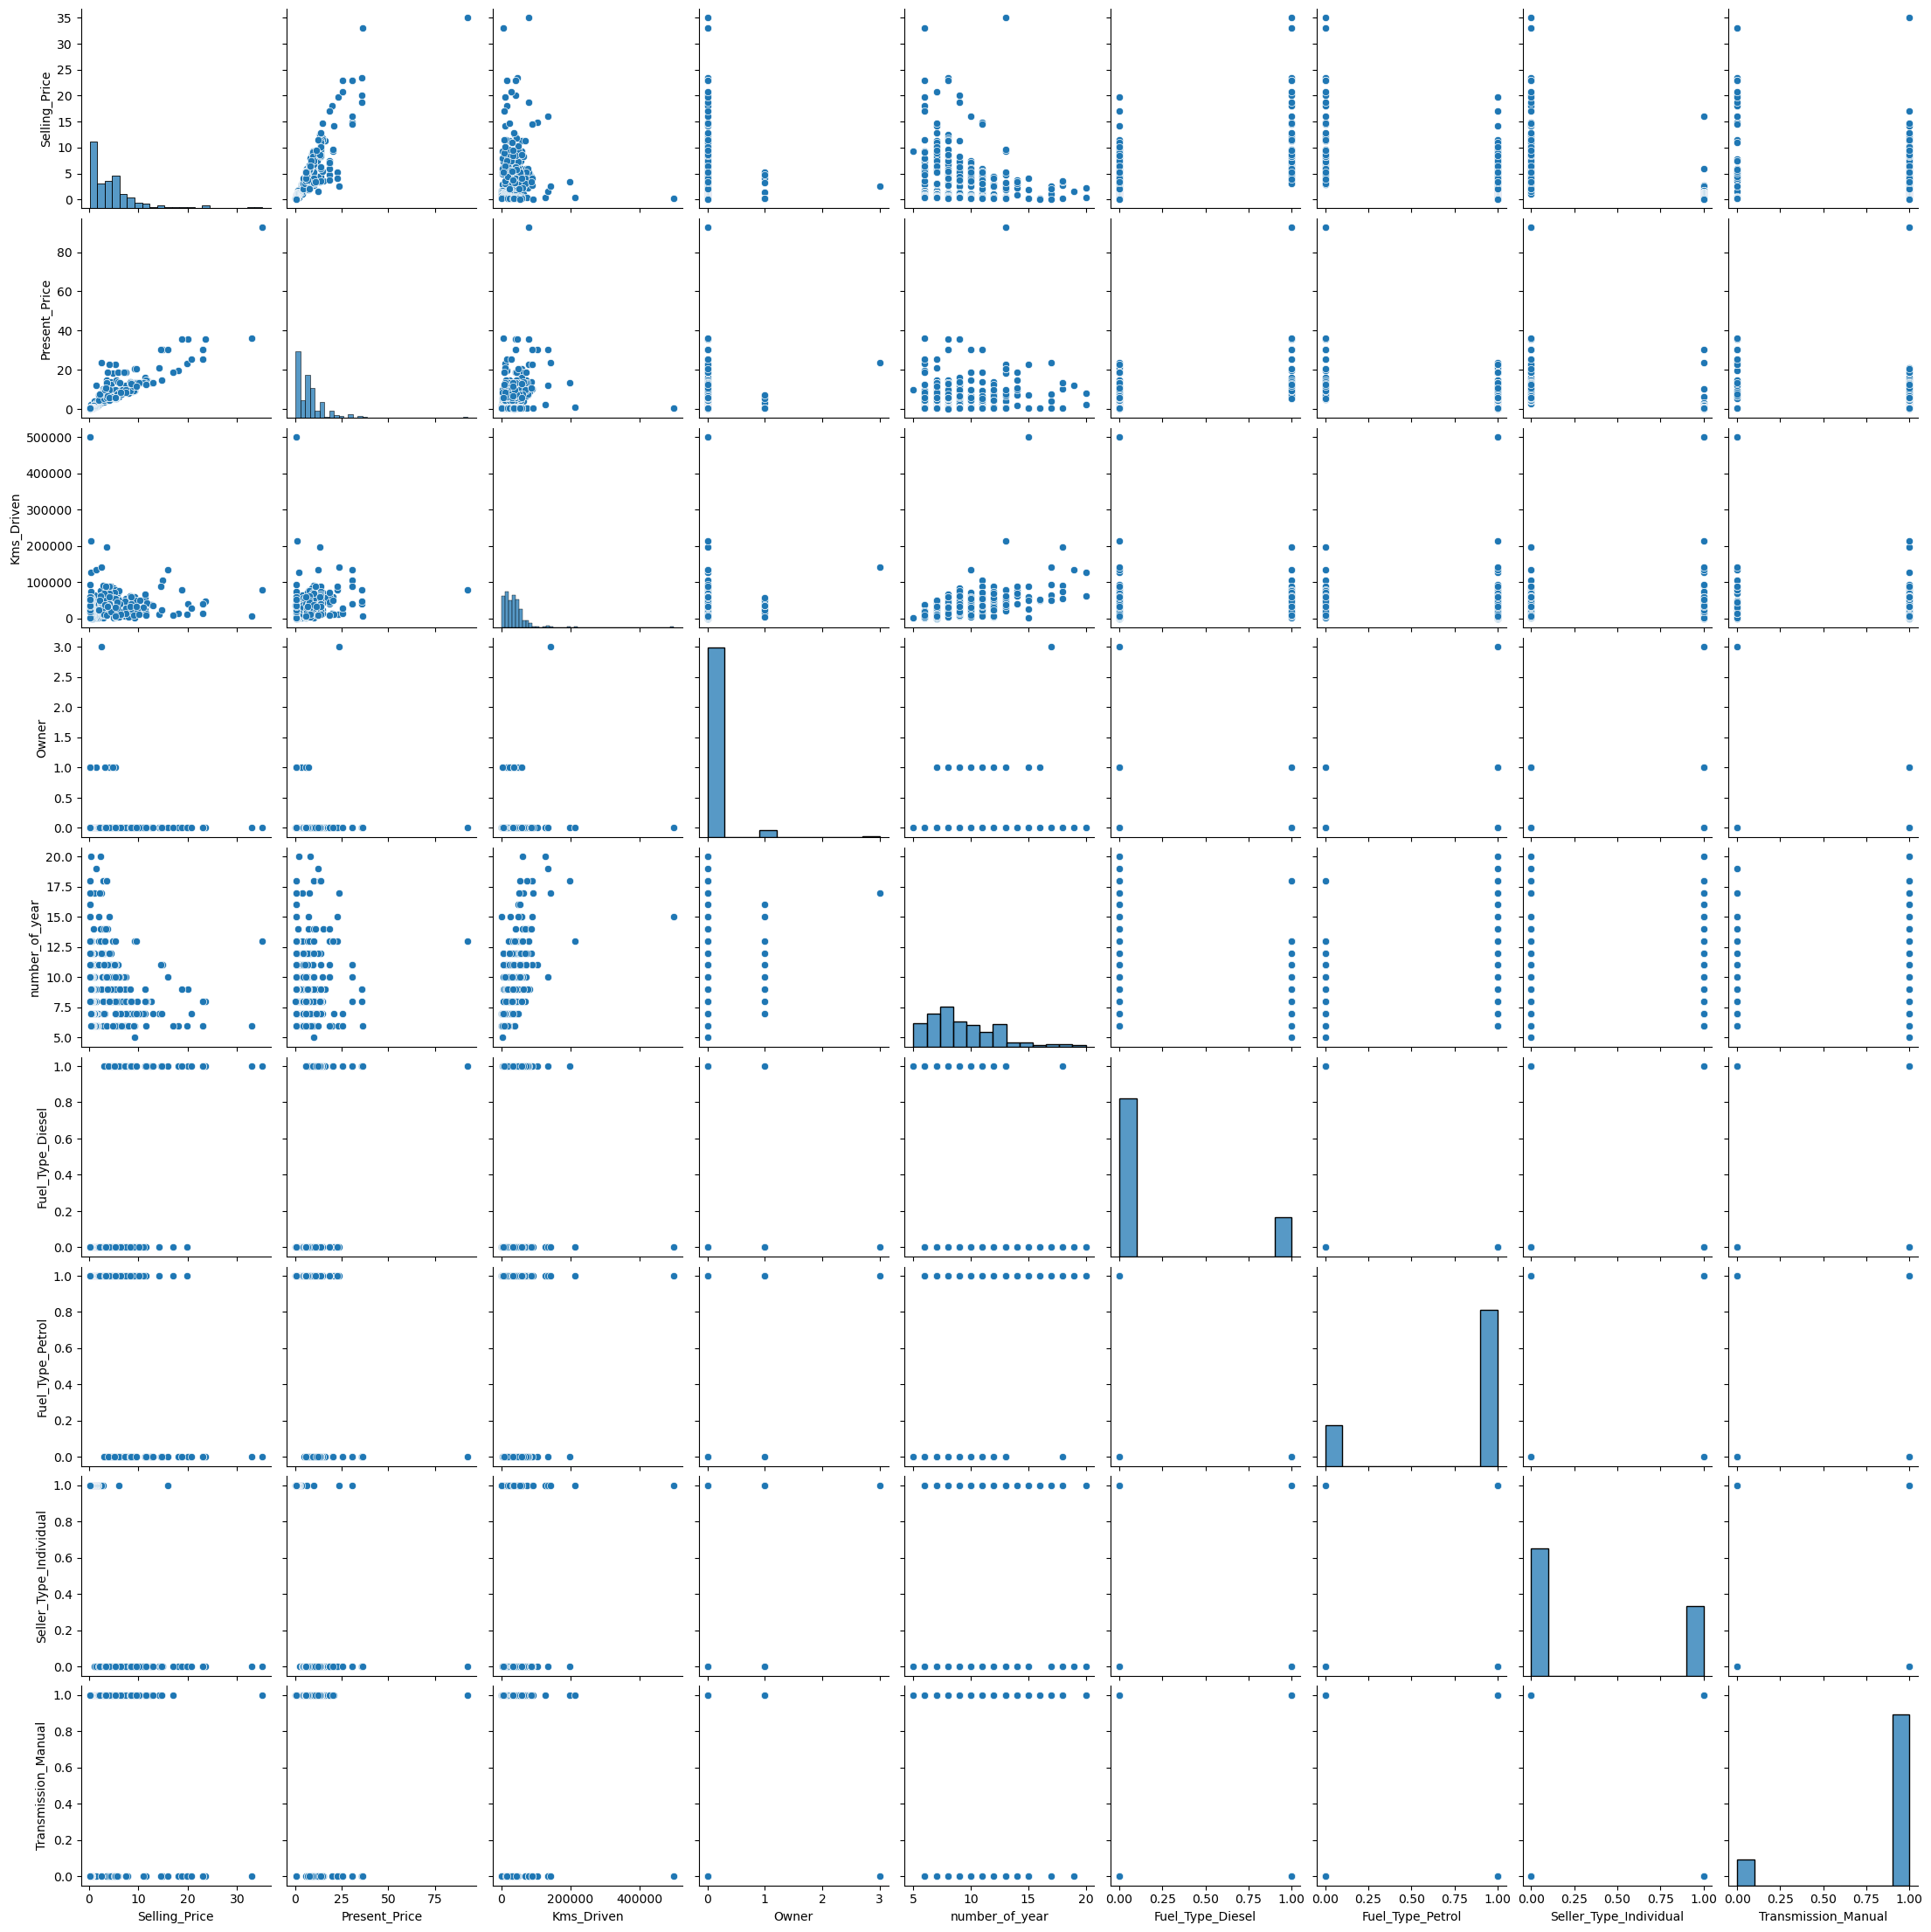

In [17]:
sns.pairplot(final_df)

<Figure size 2000x2000 with 0 Axes>

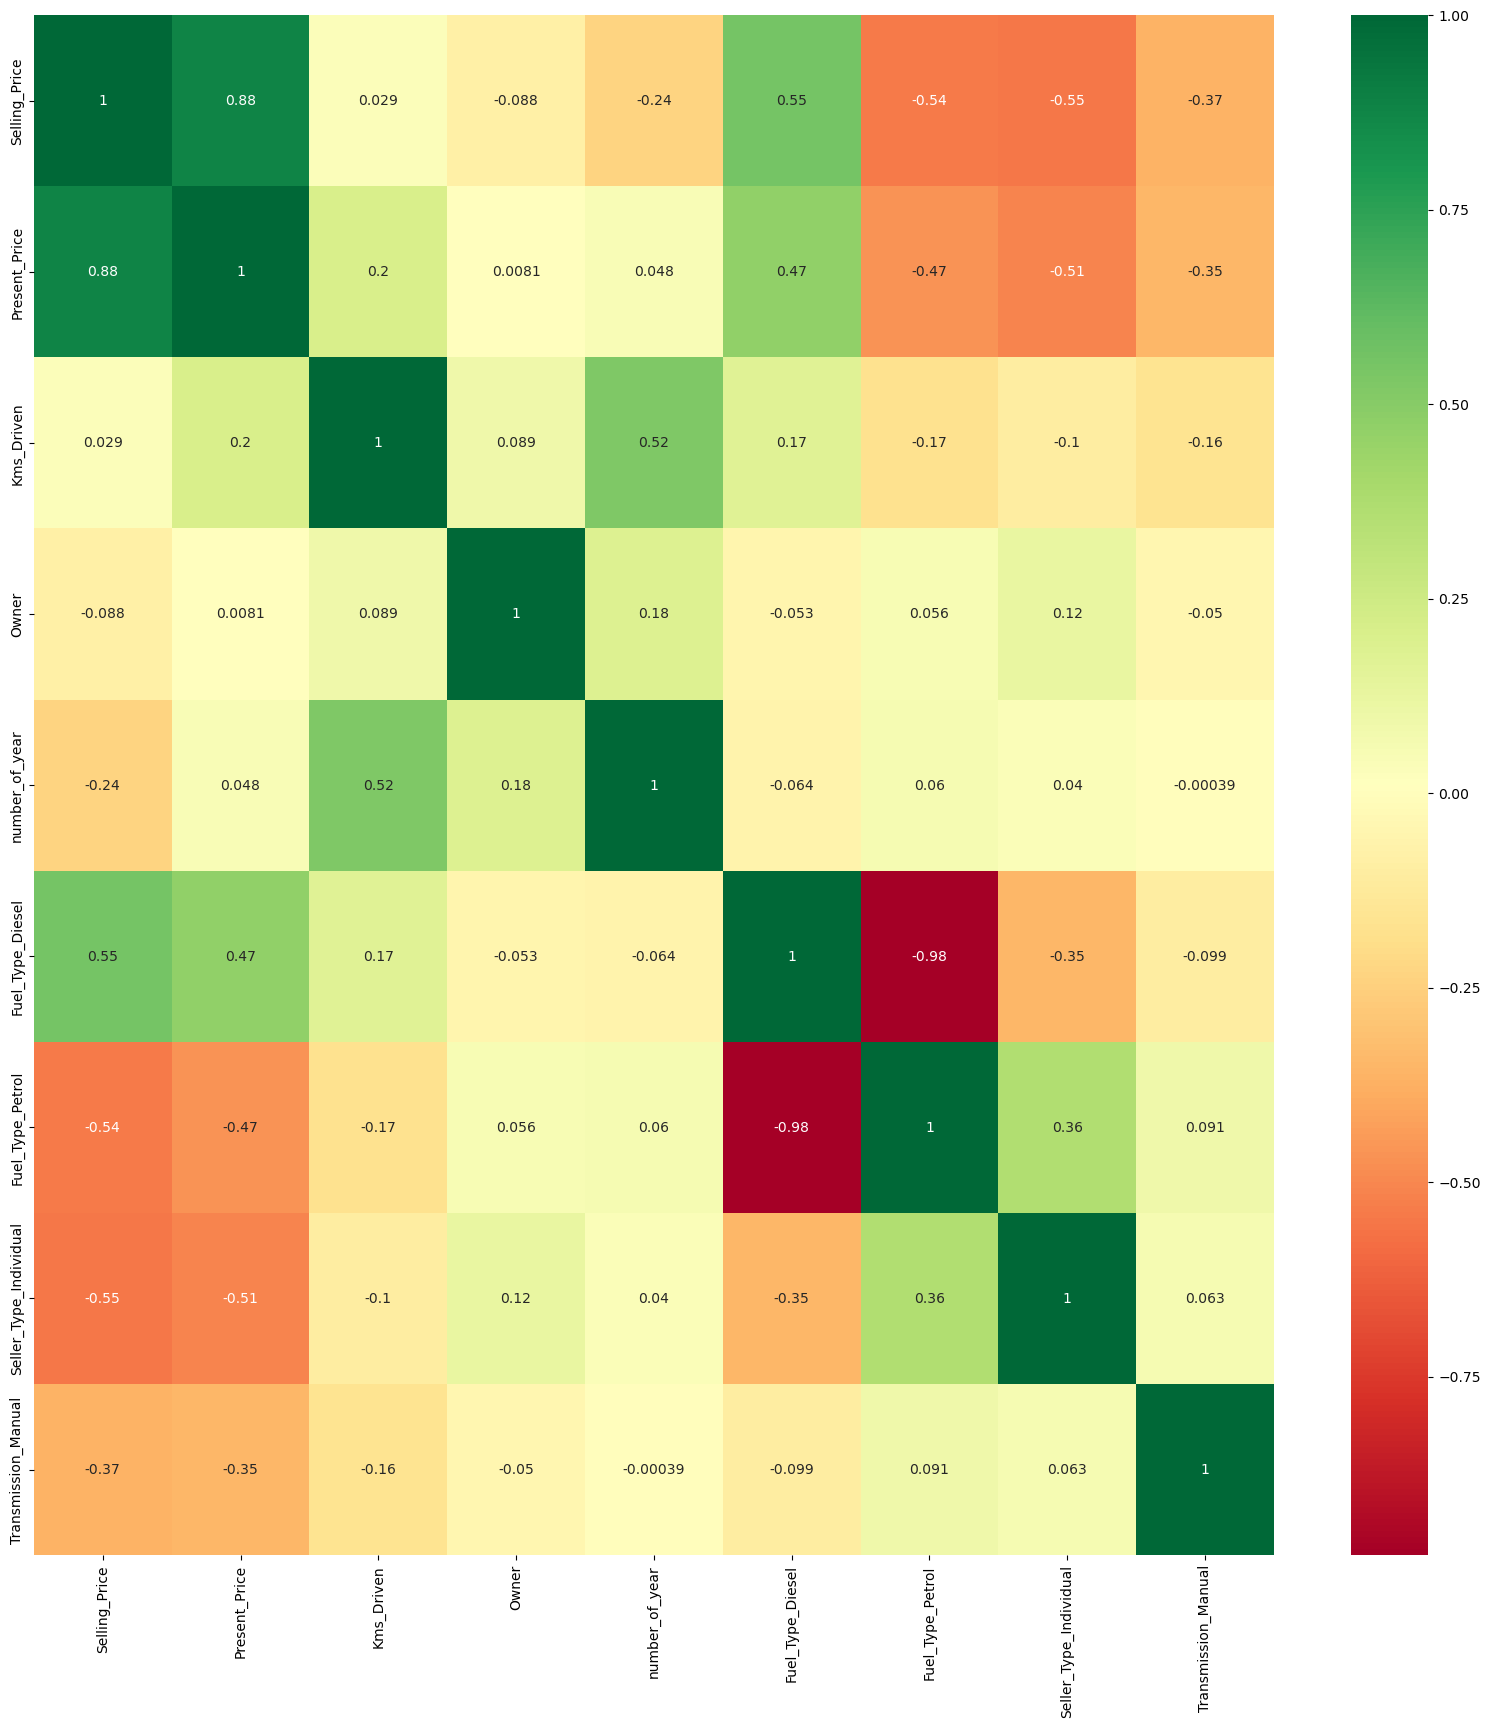

In [18]:
corrmat = final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize= (20,20))

fig1 = sns.heatmap(final_df[top_corr_features].corr(), annot= True, cmap = 'RdYlGn')

In [19]:
#final_df[:5]
# Independent and Dependent features
X = final_df.iloc[:, 1:]
X[:5]
X.shape

y= final_df.iloc[:,0]
y[:5]
y.shape

,Present_Price,Kms_Driven,Owner,number_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


(301, 8)

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

(301,)

In [20]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model= ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [21]:
model.feature_importances_

array([0.37096307, 0.03942219, 0.00045203, 0.07658169, 0.23464907,
       0.00906306, 0.12671447, 0.14215442])

<AxesSubplot:>

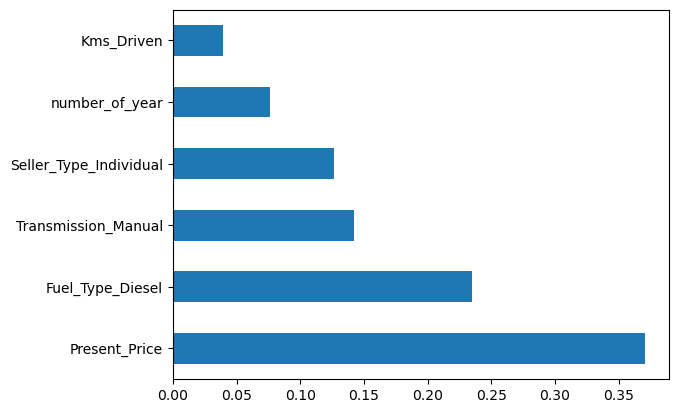

In [22]:
# Plot graph of Feature importance
feature_imp = pd.Series(model.feature_importances_,index = X.columns)
feature_imp.nlargest(6).plot(kind= 'barh')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

X_train.shape
y_train.shape

X_test.shape

(240, 8)

(240,)

(61, 8)

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [30]:
from sklearn.model_selection import RandomizedSearchCV
rf= RandomForestRegressor()

In [29]:
# Hyperparameters
# number of trees in Random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop= 1200, num= 12)]


# number of features to consider in every split
max_features = ['auto', 'sqrt']

#maximum number of levels in tree
max_depth = [int (x) for x in np.linspace(5,30, num= 6)]

# minimum number of samples required to split the node
min_samples_split = [2,5,10,15,100]

# minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [28]:
# Create random grid
random_grid = {'n_estimators': n_estimators,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [31]:
rf_random = RandomizedSearchCV(estimator= rf, param_distributions= random_grid,scoring= 'neg_mean_squared_error', n_iter= 10, cv=5,verbose=2,random_state= 42,n_jobs=1)


In [32]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [35]:
rf_random.best_params_
rf_random.best_score_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

-3.4281981695280415

array([21.74872906,  1.07448316,  0.41786779,  4.94916679, 11.02696087,
        9.75784665,  0.35843999,  0.2508488 ,  1.16253837, 10.65558376])

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

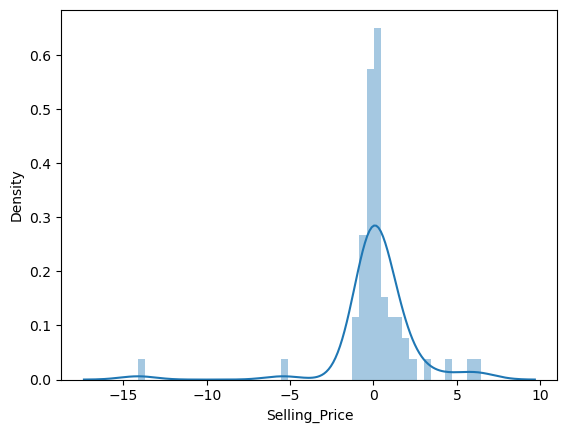

In [34]:
predictions = rf_random.predict(X_test)
predictions[:10]

sns.distplot(y_test- predictions)

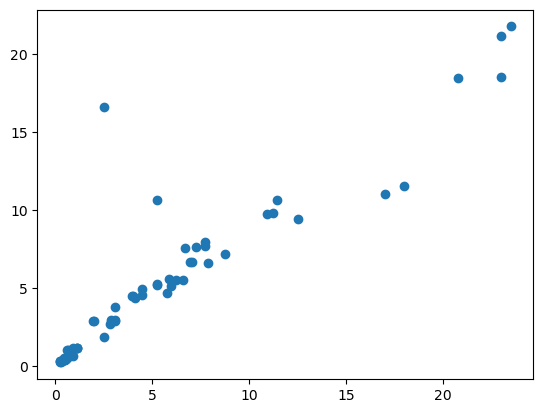

In [39]:
plt.scatter(y_test,predictions)

In [1]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

NameError: name 'rf_random' is not defined

In [42]:
final_df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'number_of_year', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')